###데이터 불러오기
- 2개의 데이터 활용
  - 승하차 정보 : seoul-metro-2021.logs.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 승하차 정보 : people_in, pepole_out

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2025_cheonan/seoul-metro-2021.logs.csv')
data

,timestamp,station_code,people_in,people_out
0,2021-01-01T05:00:00.000+09:00,150,86,85
1,2021-01-01T06:00:00.000+09:00,150,111,355
2,2021-01-01T07:00:00.000+09:00,150,157,438
3,2021-01-01T08:00:00.000+09:00,150,306,592
4,2021-01-01T09:00:00.000+09:00,150,333,841
...,...,...,...,...
1941548,2021-12-31T19:00:00.000+09:00,2828,74,263
1941549,2021-12-31T20:00:00.000+09:00,2828,73,145
1941550,2021-12-31T21:00:00.000+09:00,2828,95,209
1941551,2021-12-31T22:00:00.000+09:00,2828,54,138


- 지하철 역정보

In [3]:
station_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2025_cheonan/seoul-metro-station-info.csv')
station_info

,station.code,station.fr_code,line.num,line.name,line.name_sub,line.station_seq,station.name_full,station.name,station.name_chc,station.name_chn,station.name_en,station.name_jp,geo.latitude,geo.longitude,geo.sigungu_code,geo.sigungu_name,geo.addres_road,geo.address_land,geo.phone
0,158,124,1,1호선,지하철1호선,1,청량리(서울시립대입구),청량리|서울시립대입구,祭基洞,祭基洞,Jegidong,チェギドン,37.580178,127.046835,11060,동대문구,서울특별시 동대문구 왕산로 지하205(전농동),서울특별시 동대문구 전농동 620-69 청량리역(1호선),02-6110-1241
1,157,125,1,1호선,지하철1호선,2,제기동,제기동,新設洞,新设洞,Sinseoldong,シンソルトン,37.578103,127.034893,11060,동대문구,서울특별시 동대문구 왕산로 지하93(제기동),서울특별시 동대문구 제기동 65 제기동역(1호선),02-6110-1251
2,156,126,1,1호선,지하철1호선,3,신설동,신설동,東廟앞,东庙,Dongmyo,トンミョアプ,37.575297,127.025087,11060,동대문구,서울특별시 동대문구 왕산로 지하1(신설동),서울특별시 동대문구 신설동 76-5 신설동역(1호선),02-6110-1261
3,159,127,1,1호선,지하철1호선,4,동묘앞,동묘앞,淸凉里(서울市立大入口),清凉里(首尔市立大学),Cheongnyangni(University of Seoul),チョンニャンニ,37.572627,127.016429,11010,종로구,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),02-6110-1271
4,155,128,1,1호선,지하철1호선,5,동대문,동대문,東大門,东大门,Dongdaemun,トンデムン,37.571420,127.009745,11010,종로구,서울특별시 종로구 종로 지하302(창신동),서울특별시 종로구 창신동 492-1 동대문역(1호선),02-6110-1281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2823,823,8,8호선,지하철8호선,14,남한산성입구(성남법원.검찰청),남한산성입구|성남법원|검찰청,南漢山城入口(城南法院檢察廳),南汉山城(城南法院·检察厅),Namhansanseong(Seongnam Court & Prosecutors' O...,ナムハンサンソンイック,37.451535,127.159816,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하445(단대동),경기도 성남시 수정구 단대동 96 남한산성입구역(8호선),02-6311-8231
281,2824,824,8,8호선,지하철8호선,15,단대오거리,단대오거리,丹垈오거리,丹垈五岔路口,Dandaeogeori,タンデオゴリ,37.445210,127.156866,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하365(신흥동),경기도 성남시 수정구 신흥동 2467 단대오거리역(8호선),02-6311-8241
282,2825,825,8,8호선,지하철8호선,16,신흥,신흥,新興,新兴,Sinheung,シンフン,37.440918,127.147564,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하280(신흥동),경기도 성남시 수정구 신흥동 2467 신흥역(8호선),02-6311-8251
283,2826,826,8,8호선,지하철8호선,17,수진,수진,壽進,寿进,Sujin,スジン,37.437428,127.140722,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하200(수진동),경기도 성남시 수정구 수진동 2205-1 수진역(8호선),02-6311-8261


##데이터 가공

###승하차 인원 데이터 상세 정보 확인

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941553 entries, 0 to 1941552
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   station_code  int64 
 2   people_in     int64 
 3   people_out    int64 
dtypes: int64(3), object(1)
memory usage: 59.3+ MB


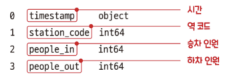

###역 기준으로 승하차 인원 합치기
- 데이터가 시간으로 쪼개져 있어 groupby()메서드 활용
- sum()를 사용해 station_code 기준으로 그룹화한 다음 값을 합치기

In [5]:
station_sum = data.groupby('station_code').sum()
station_sum

,timestamp,people_in,people_out
station_code,,,
150,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,12697273,12109991
151,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,5997344,6030491
152,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,9638952,9284693
153,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,7704599,7090896
154,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,6651283,6609055
...,...,...,...
2824,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,3206211,3097722
2825,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,1395919,1495603
2826,2021-01-01T05:00:00.000+09:002021-01-01T06:00:...,1614590,1475010


In [20]:
station_sum = station_sum.drop('timestamp', axis=1)
station_sum

KeyError: "['timestamp'] not found in axis"

###지하철역 데이터 상세 정보 확인하기
- 지하철 역 코드 정보만 있어서 어떤 역인지 확인 불가
- 역 코드에 대응하는 역의 정보를 추가



- 지하철역 정보 확인

In [21]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station.code       285 non-null    int64  
 1   station.fr_code    285 non-null    object 
 2   line.num           285 non-null    int64  
 3   line.name          285 non-null    object 
 4   line.name_sub      285 non-null    object 
 5   line.station_seq   285 non-null    int64  
 6   station.name_full  285 non-null    object 
 7   station.name       285 non-null    object 
 8   station.name_chc   285 non-null    object 
 9   station.name_chn   285 non-null    object 
 10  station.name_en    285 non-null    object 
 11  station.name_jp    285 non-null    object 
 12  geo.latitude       285 non-null    float64
 13  geo.longitude      285 non-null    float64
 14  geo.sigungu_code   285 non-null    int64  
 15  geo.sigungu_name   285 non-null    object 
 16  geo.addres_road    285 non

- 행 추리기
  - 역코드(station.code)
  - 위도(geo.latitude)
  - 경도(geo.longitude)

In [22]:
#필요한 행만 추려내기
station_info = station_info[['station.code','geo.latitude','geo.longitude']]

#데이터 확인하기
station_info

,station.code,geo.latitude,geo.longitude
0,158,37.580178,127.046835
1,157,37.578103,127.034893
2,156,37.575297,127.025087
3,159,37.572627,127.016429
4,155,37.571420,127.009745
...,...,...,...
280,2823,37.451535,127.159816
281,2824,37.445210,127.156866
282,2825,37.440918,127.147564
283,2826,37.437428,127.140722


###승하차 인원 데이터와 색인 맞추기
- 승하차 인원의 index는 역 코드
- set_index()를 이용해서 동일한 색인 맞추기

In [23]:
station_info = station_info.set_index('station.code')
station_info

,geo.latitude,geo.longitude
station.code,,
158,37.580178,127.046835
157,37.578103,127.034893
156,37.575297,127.025087
159,37.572627,127.016429
155,37.571420,127.009745
...,...,...
2823,37.451535,127.159816
2824,37.445210,127.156866
2825,37.440918,127.147564


###승하차 인원 데이터와 지하철역 데이터 합치기
- join() : 색인을 기준으로 셋 2개를 하나로 합치기

In [24]:
joined_data = station_sum.join(station_info)
joined_data

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
150,12697273,12109991,37.554648,126.972559
151,5997344,6030491,37.564718,126.977108
152,9638952,9284693,37.570161,126.982923
153,7704599,7090896,37.571607,126.991806
154,6651283,6609055,37.570926,127.001849
...,...,...,...,...
2824,3206211,3097722,37.445210,127.156866
2825,1395919,1495603,37.440918,127.147564
2826,1614590,1475010,37.437428,127.140722


##데이터 시각화
히트맵(heatmap)
- 데이터가 많은 지역을 뜨겁게 표현
- 데이터가 집중된 곳을 쉽게 식별
- Folium 라이브러리 이용

###승차 인원 시각화
- folium.Map() : 지도 생성
- location 인수 : 위도와 경도
  - zoom_start  어느 정도 확대할 것인지 설정

In [14]:
import folium

In [15]:
seoul_in = folium.Map(location=[37.55, 126.98], zoom_start = 12)
seoul_in

###히트맵에 그리기
- add_to() : 지도 객체에 히트맵 추가

In [25]:
#히트맵 플러그인 모듈 탑재
from folium.plugins import HeatMap

#히트맵 플러그인 지도에 추가하기
HeatMap(data = joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(seoul_in)

#지도 확인하기
seoul_in

####하차인원 시각화

In [26]:
seoul_out = folium.Map(location=[37.55, 126.98], zoom_start = 12)
HeatMap(data = joined_data[['geo.latitude', 'geo.longitude', 'people_out']]).add_to(seoul_out)
seoul_out

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941553 entries, 0 to 1941552
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   station_code  int64 
 2   people_in     int64 
 3   people_out    int64 
dtypes: int64(3), object(1)
memory usage: 59.3+ MB


In [28]:
morning_data = data[pd.to_datetime(data.timestamp).dt.hour<9]
morning_data

,timestamp,station_code,people_in,people_out
0,2021-01-01T05:00:00.000+09:00,150,86,85
1,2021-01-01T06:00:00.000+09:00,150,111,355
2,2021-01-01T07:00:00.000+09:00,150,157,438
3,2021-01-01T08:00:00.000+09:00,150,306,592
19,2021-01-01T05:00:00.000+09:00,151,43,40
...,...,...,...,...
1941518,2021-12-31T08:00:00.000+09:00,2827,391,311
1941534,2021-12-31T05:00:00.000+09:00,2828,20,10
1941535,2021-12-31T06:00:00.000+09:00,2828,83,41
1941536,2021-12-31T07:00:00.000+09:00,2828,279,119


In [29]:
evening_data = data[pd.to_datetime(data.timestamp).dt.hour>17]
evening_data

,timestamp,station_code,people_in,people_out
13,2021-01-01T18:00:00.000+09:00,150,658,437
14,2021-01-01T19:00:00.000+09:00,150,579,425
15,2021-01-01T20:00:00.000+09:00,150,479,354
16,2021-01-01T21:00:00.000+09:00,150,510,307
17,2021-01-01T22:00:00.000+09:00,150,445,134
...,...,...,...,...
1941548,2021-12-31T19:00:00.000+09:00,2828,74,263
1941549,2021-12-31T20:00:00.000+09:00,2828,73,145
1941550,2021-12-31T21:00:00.000+09:00,2828,95,209
1941551,2021-12-31T22:00:00.000+09:00,2828,54,138


In [30]:
morning_station_sum = morning_data.groupby('station_code').sum()
evening_station_sum = evening_data.groupby('station_code').sum()

In [33]:
morning_joined_data = morning_station_sum.join(station_info)
evening_joined_data = evening_station_sum.join(station_info)

In [34]:
morning_seoul_in = folium.Map(location=[37.55, 126.98], zoom_start = 12)
HeatMap(data = morning_joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(morning_seoul_in)
morning_seoul_in

In [35]:
# 출근 시간 하차 인원
morning_seoul_out = folium.Map(location=[37.55, 126.98], zoom_start = 12)
HeatMap(data = morning_joined_data[['geo.latitude', 'geo.longitude', 'people_out']]).add_to(morning_seoul_out)
morning_seoul_out


In [36]:
# 퇴근 시간 승차 인원
evening_seoul_in = folium.Map(location=[37.55, 126.98], zoom_start = 12)
HeatMap(data = evening_joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(evening_seoul_in)
evening_seoul_in


In [37]:
# 퇴근 시간 하차 인원
evening_seoul_out = folium.Map(location=[37.55, 126.98], zoom_start = 12)
HeatMap(data = evening_joined_data[['geo.latitude', 'geo.longitude', 'people_out']]).add_to(evening_seoul_out)
evening_seoul_out
